In [1]:
import math
    #Numeric Python
import numpy as np
    #Pandas (dataframes)
import pandas as pd
    #datetime for fate manipulation
from datetime import date, datetime, timedelta  
    #Regex for advanced string matching
import re
    #for time related stuff
import time
    #json library
import json
    #Analyst tools
import sys
sys.path.append('~')
from analysts_tools.growth import *
    #Procurement tools
from analystcommunity.read_connection_data_warehouse import run_read_dwd_query
from analysts_tools.redash_methods import *
from procurement_lib import redash, send_slack_notification, GoogleSheet

import random
import time
import datetime

In [2]:
df = pd.read_csv("papeis.csv")

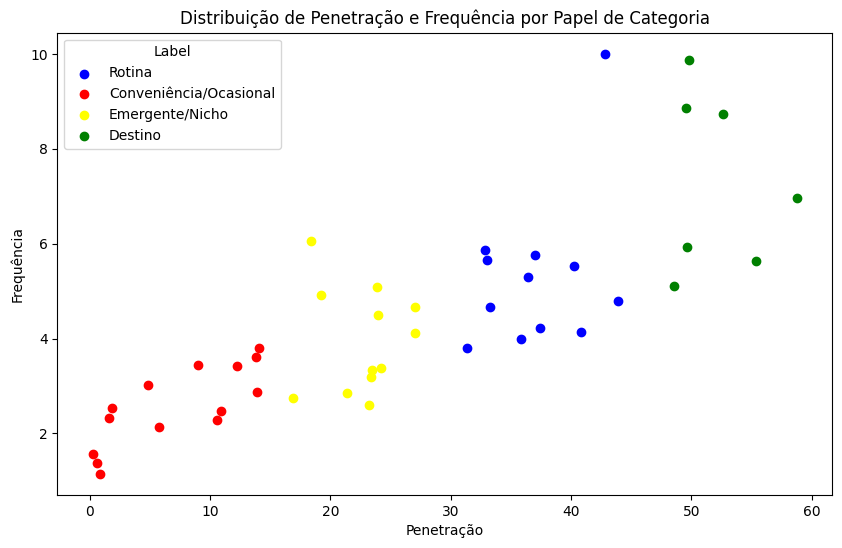

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suponiendo que tienes un DataFrame df con las columnas 'penetration' y 'frequency'
# df = pd.DataFrame({'penetration': [...], 'frequency': [...]})

# Aplica KMeans con 4 clusters (puedes ajustar este número)
kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(df[['penetracion', 'freq']])

# Define los colores y etiquetas para cada cluster
cluster_labels = {0: 'Rotina', 1: 'Conveniência/Ocasional', 2: 'Emergente/Nicho', 3: 'Destino'}
colors = {0: 'blue', 1: 'red', 2: 'yellow', 3: 'green'}

# Asigna los colores y las etiquetas basados en los clusters
df['color'] = df['cluster'].apply(lambda x: colors[x])
df['label'] = df['cluster'].apply(lambda x: cluster_labels[x])

# Plot
plt.figure(figsize=(10, 6))

# Crear un scatter plot para cada cluster, con colores y etiquetas
for cluster, color in colors.items():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['penetracion'], subset['freq'], c=color, label=cluster_labels[cluster])

# Añadir etiquetas, título y leyenda
plt.title('Distribuição de Penetração e Frequência por Papel de Categoria')
plt.xlabel('Penetração')
plt.ylabel('Frequência')
plt.legend(title="Label", loc='best')

plt.show()



In [19]:
df.groupby(['label','subcategory']).sum()

freq  \
label                  subcategory                                  
Conveniência/Ocasional Bomboniere e snacks               2.877600   
                       Carne vermelha                    3.416548   
                       Desengordurantes                  2.124129   
                       Doces e sobremesas                2.316439   
                       Embalagens                        1.574074   
                       Frutas e legumes congelados       3.613307   
                       Grãos                             2.279522   
                       Outros congelados                 2.542897   
                       Outros limpadores                 2.474441   
                       Peixes e frutos do mar            3.027122   
                       Polpas e açaí                     3.437867   
                       Suínos                            3.798728   
                       Utensílios                        1.147741   
                       Vinhos e espumantes               1.364829   
Destino                Azeites, óleos e vinagres         6.956214   
                       Açúcar, adoçantes e doces         5.629737   
                       Frutas                            8.861892   
                       Legumes                           9.870885   
                       Leite                             5.938288   
                       Refrigerantes e energéticos       5.111870   
                       Tubérculos                        8.727014   
Emergente/Nicho        Batatas pré-fritas e aperitivos   4.917822   
                       Cervejas                          3.186880   
                       Conservas e enlatados             4.108636   
                       Destilados                        2.753962   
                       Embutidos                         4.657115   
                       Frango                            5.095055   
                       Laticínios                        4.498098   
                       Manteigas e margarinas            3.377900   
                       Ovos                              6.062243   
                       Papéis                            3.334230   
                       Sucos e chás                      2.845379   
                       Utensílios de limpeza             2.594862   
Rotina                 Arroz                             5.859737   
                       Café, chocolates e infusões       3.992275   
                       Condimentos                       4.674384   
                       Desinfetantes e sanitizantes      4.213847   
                       Detergente, sabão e lava-louças   4.796622   
                       Farinhas e misturas               5.520915   
                       Feijão                            5.769898   
                       Massas e molhos                   5.288519   
                       Queijos                           5.665295   
                       Temperos                          4.129359   
                       Verduras                         10.007375   
                       Águas e isotônicos                3.796059   

                                                        penetracion  cluster  
label                  subcategory                                            
Conveniência/Ocasional Bomboniere e snacks                13.891257        1  
                       Carne vermelha                     12.205172        1  
                       Desengordurantes                    5.740267        1  
                       Doces e sobremesas                  1.619778        1  
                       Embalagens                          0.227337        1  
                       Frutas e legumes congelados        13.777588        1  
                       Grãos                              10.561713        1  
                       Outros congelados                   1.870797        1  
                       Outr

In [5]:
df2 = pd.read_csv('skus.csv')

In [8]:
df2

,region_code,category,subcategory,card_id,product_name,penet,gmv_usd,Sales_CumPct,Class_Sales
126,SPO,Mercearia,"Azeites, óleos e vinagres",293209,Óleo Vitaliv 900ml,45.576610,1.365718e+06,9.057611,A
589,SPO,Mercearia,Arroz,123459,Arroz Branco Camil Food Service 5kg,17.129737,6.373276e+05,13.284445,A
648,SPO,Laticínios e ovos,Leite,411567,Leite Integral Hércules 1L,29.109509,5.377370e+05,16.850782,A
14,SPO,Mercearia,Arroz,231959,Arroz Branco Campeiro 5Kg,11.846082,5.177961e+05,20.284869,A
799,SPO,Mercearia,"Açúcar, adoçantes e doces",84011,Açúcar Alto Alegre 1Kg,44.826784,5.091159e+05,23.661388,A
...,...,...,...,...,...,...,...,...,...
733,SPO,Mercearia,Farinhas e misturas,461915,Farinha de Mandioca Grossa Kisabor 1kg,0.005813,2.421050e+00,99.999954,C
887,SPO,Despensa,Temperos,462734,Orégano Kisabor 200g,0.005813,2.416840e+00,99.999970,C
971,SPO,Mercearia,Farinhas e misturas,459471,Farinha Panko Oriental Orquídea 200g,0.005813,2.056840e+00,99.999983,C
968,SPO,Despensa,Temperos,462727,Tempero Para Arroz Branco Kisabor 12x5g,0.005813,1.498940e+00,99.999993,C


In [20]:
import pandas as pd
import plotly.express as px

# Suponiendo que ya tienes un DataFrame llamado df2
# Ordenar por ventas (gmv_usd)
df2 = df2.sort_values(by='gmv_usd', ascending=False)

# Calcular el porcentaje acumulado de ventas
df2['Sales_CumPct'] = df2['gmv_usd'].cumsum() / df2['gmv_usd'].sum() * 100

# Clasificación ABCD basada en ventas
df2['Class_Sales'] = pd.cut(df2['Sales_CumPct'], bins=[0, 50, 70, 90], labels=['A', 'B', 'C'], right=False)

# Agregar la categoría 'D' antes de usar fillna
df2['Class_Sales'] = df2['Class_Sales'].cat.add_categories('D')
df2['Class_Sales'].fillna('D', inplace=True)

# Ordenar por penetración (penet)
df2 = df2.sort_values(by='penet', ascending=False)

# Calcular el porcentaje acumulado de penetración
df2['Penetration_CumPct'] = df2['penet'].cumsum() / df2['penet'].sum() * 100

# Clasificación ABCD basada en penetración
df2['Class_Penetration'] = pd.cut(df2['Penetration_CumPct'], bins=[0, 50, 70, 90], labels=['A', 'B', 'C'], right=False)

# Agregar la categoría 'D' antes de usar fillna
df2['Class_Penetration'] = df2['Class_Penetration'].cat.add_categories('D')
df2['Class_Penetration'].fillna('D', inplace=True)

# Combinar las clasificaciones (opcional)
df2['Overall_Class'] = df2[['Class_Sales', 'Class_Penetration']].apply(lambda x: max(x), axis=1)

# Graficar los puntos usando Plotly Express
fig = px.scatter(
    df2,
    x='gmv_usd',
    y='penet',
    color='Overall_Class',
    hover_name='product_name',  # Asegúrate de tener una columna 'sku' para identificar los productos
    title="Clasificación ABCD de productos",
)

fig.show()

In [23]:
df3 = df2.groupby('Overall_Class').agg(
    skus=('card_id','nunique'),
    gmv_usd=('gmv_usd',np.sum)
).reset_index()

In [27]:
df3['gmv_mix'] = 100.00*df3.gmv_usd/df3.gmv_usd.sum()

In [28]:
df3

,Overall_Class,skus,gmv_usd,gmv_mix
0,A,24,6.799379e+06,45.094305
1,B,49,3.218769e+06,21.347268
2,C,163,3.122715e+06,20.710228
3,D,737,1.937268e+06,12.848198
